# Probability Distributions

[Link to lecture](https://github.com/bcaffo/Caffo-Coursera/blob/master/lecture7.pdf)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import scipy as sp
from scipy.special import comb
from scipy.stats import norm, binom

## Binomial Distribution
A binomial random variable is the sum of n iid Bernoulli random variables, which corresponds to the number of successes in n trials. Bernoulli random variables are variables that can take two values only: Success or 1 (with a probability of p) and Failure or 0 (with a probability of 1-p).

The density function is computed by multiplying the possible combinations to get k successful results, i.e. 1, from n trials (n choose k) multiplied by the probability of getting k successful results regardless of the order.

In [2]:
def plot_binomial_hist(n, p, num=1000):
    '''
    Plot a binomial distribution using n trials with a success probability p.
    '''
    vals = np.random.binomial(n, p, num)
    
    plt.figure(figsize=(8,6))
    
    x = np.arange(n+1)
    height = np.array([(vals==i).sum() for i in x]) / len(vals)
    
    plt.bar(x, height, color='skyblue', edgecolor='white', width=1)
    
    plt.xticks(x)
    
    plt.title('Binomial n={} / p={}'.format(n, p))
    plt.show()

In [3]:
def binomial_prob(x, n, p):
    '''
    Compute the probability of x in a binomial distribution
    defined by n and p.
    '''
    # n choose x
    nx = comb(n, x)
    
    prob = nx * p**x * (1-p)**(n-x)
    
    return prob

**Ex 1:**

* Measuring the number of heads (successes) from one coin toss. This is equivalent to a Bernoulli distribution.

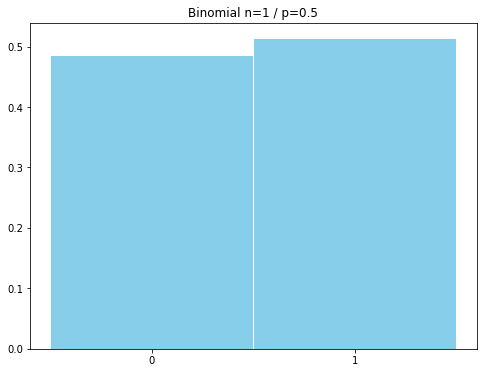

In [4]:
# This is equivalent to a Bernoulli distribution
plot_binomial_hist(1, 0.5)

**Ex 2:**
* Measuring the number of heads (successes) from 10 coin tosses with a head probability p=0.8.
* Measureing the number of faulty products out of 10 products, with a probability of a product being faulty p=0.8 (Pretty bad factory).

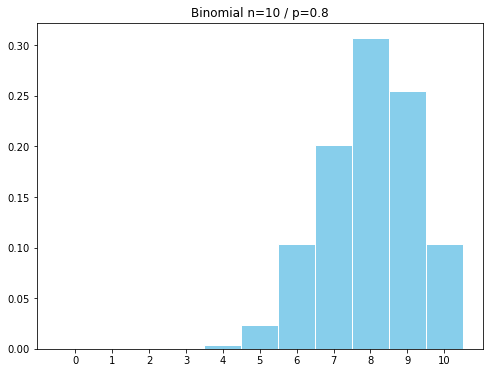

P(X=5) = 0.026424115199999976


In [5]:
n = 10
p = 0.8
plot_binomial_hist(n, p)
x = 5
print('P(X=5) = {}'.format(binomial_prob(x, n, p)))

**Ex 3:**

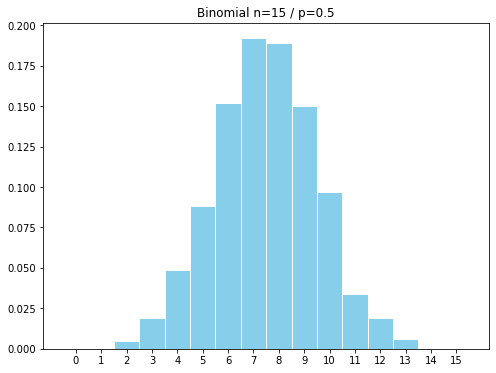

P(X=5) = 0.091644287109375


In [6]:
n = 15
p = 0.5
plot_binomial_hist(n, p)
x = 5
print('P(X=5) = {}'.format(binomial_prob(x, n, p)))

## Normal Distribution
* A normal distribution can be defined by the mean and the variance.
* A normal distribution with mean 0 and variance 1 is called a standard normal distribution.
* Tranforming a non-standard normal random variable to a standard normal random variable can be easily done by subtracting the mean and dividing by the standard deviation.
* -1.28, -1.645, -1.96, -2.33 are the 10th, 5th, 2.5th, and 1st percentiles of a standard normal distribution respectively.
* For any non-standard normal random variable, the nth percentile can be obtained as a function of the nth percentile of a standard normal distribution:
$$ p = \sigma p_0 + \mu $$

Where p is the nth percentile of a normal distribution, p0 is the nth percentile of a standard normal distribution, and $\mu$ , $\sigma$ are the mean and standard deviation of the concerning normal distribution.

* The mean, mode, and median of a normal distribution are all equal.


**Visualizing the normal distribution**

The following plot shows a sample drawn from a normal distribution (the gray markers), the sample's histogram, and the probability density function of the population from which the sample was drawn.

Notice the concentration of points around the mean.

In [7]:
def plot_normal_dist(mean, std, n=200, ax=None, bins=15):
    '''
    Draws an n sized sample from a normal distribution with a mean and standard deviation
    as defined in mean and std, respectively.
    
    The sample random variables are plotted along with their histogram and the pdf of the population
    that the sample was drawn from.
    '''
    if ax is None:
        fig, ax = plt.subplots(figsize=(8, 6))
       
    # Drawing a sample with size n from a normal distribution
    x = np.random.normal(loc=mean, scale=std, size=n)
    
    # Plotting density function
    xmax = max(np.abs(x-mean)) + mean
    xmin = xmax - 2*(xmax - mean)

    x_coord = np.linspace(xmin, xmax, 100)
    y_coord = norm.pdf(x_coord, loc=mean, scale=std)
    ax.plot(x_coord, y_coord, color='orangered', label='Population PDF')
    
    # Plotting histogram
    vals, edges = np.histogram(x, bins=bins)
    ax.hist(x, bins=edges, density=True, label='Sample histogram',
            color='skyblue', edgecolor='w')
    
    # Plotting scatter
    jitter = np.random.uniform(-0.03, -0.01, len(x))
    ax.scatter(x=x, y=jitter, color='gray', alpha=0.3, label='Random variable sample')
    
    # Annotation
    ax.set_xlabel('Random variable value')
    ax.set_ylabel('Probability density')
    ax.set_xticks(edges)
    labels = list(map(lambda x: '{:.2f}'.format(x), edges))
    ax.set_xticklabels(labels, rotation=45)
    yticks = ax.get_yticks()
    ax.set_yticks(yticks[yticks>=0])


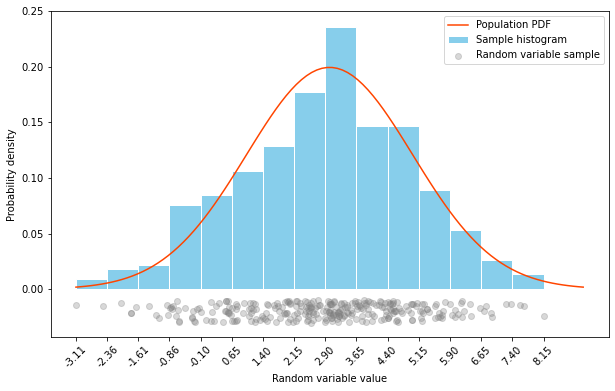

In [8]:
n = 300
mean = 3
std = 2

fig, ax = plt.subplots(figsize=(10, 6))
plot_normal_dist(mean, std, n, ax=ax)
ax.legend()
plt.show()

* The sum of two normal random variables is a normal random variable with:
$$ \mu = \mu_1 + \mu2 $$
$$ \sigma^2 = \sigma_1^2 + \sigma_2^2 $$

X1:
   Sample / Population mean: 1.012 / 1.000
   Sample / Population variance: 4.077 / 4.000


X2:
   Sample / Population mean: 4.885 / 5.000
   Sample / Population variance: 1.328 / 1.690


X_sum:
   Sample / Population mean: 5.896 / 6.000
   Sample / Population variance: 4.963 / 5.690




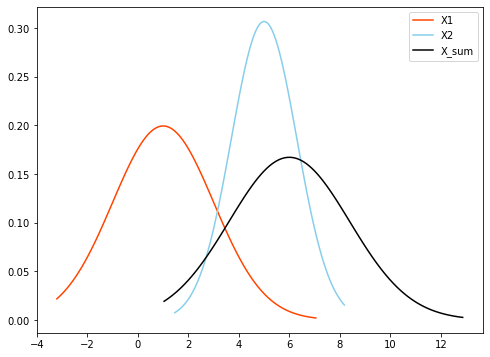

In [9]:
n = 200

# Sample 1
mu1 = 1
sig1 = 2
x1 = norm.rvs(loc=mu1, scale=sig1, size=n)

# Sample 2
mu2 = 5
sig2 = 1.3
x2 = norm.rvs(loc=mu2, scale=sig2, size=n)

# Sum of both samples
x_sum = x1 + x2
mu_sum = mu1 + mu2
sig_sum = np.sqrt(sig1**2 + sig2**2)

fig, ax = plt.subplots(figsize=(8, 6))

colors = ['orangered', 'skyblue', 'black']
labels = ['X1', 'X2', 'X_sum']
for x, mu, sig, color, label in zip([x1, x2, x_sum], [mu1, mu2, mu_sum], [sig1, sig2, sig_sum], colors, labels):
    x_coord = np.linspace(x.min(), x.max(), 100)
    pdf = norm.pdf(x_coord, scale=sig, loc=mu)
    ax.plot(x_coord, pdf, label=label, color=color)
    
    print(f'{label}:')
    print('   Sample / Population mean: {:.3f} / {:.3f}'.format(x.mean(), mu))
    print('   Sample / Population variance: {:.3f} / {:.3f}'.format(x.var(), sig**2))
    print('\n')
    
ax.legend()
plt.show()